https://medium.com/@deepml1818/predicting-stock-prices-with-machine-learning-in-python-a-step-by-step-guide-c53f36ab1ccd

data collection, preprocessing, feature engineering, model selection, and evaluation.

In [2]:
!pip install yfinance pandas scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 12.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=138964 sha256=c2a0d3dfe9e5bb84cb80361596339b8c7da848f50873f05509789e794396ef5e
  Stored in directory: /Users/sb/Library/Caches/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


Step 2: Fetch Historical Data

In [104]:
import yfinance as yf
import pandas as pd

# Fetch historical data for Apple Inc.
ticker = 'AAPL'
data = yf.download(ticker)

# Display the first few rows of the dataset
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
1980-12-12  0.098834  0.099264  0.098834  0.098834  469033600
1980-12-15  0.093678  0.094108  0.093678  0.094108  175884800
1980-12-16  0.086802  0.087232  0.086802  0.087232  105728000
1980-12-17  0.088951  0.089381  0.088951  0.088951   86441600
1980-12-18  0.091530  0.091959  0.091530  0.091530   73449600


Step 3: Preprocess Data

In [106]:
# Calculate moving averages # Calculate the 10-day and 50-day moving averages of the closing prices.
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Drop NaN values # Removes rows with missing values that result from calculating moving averages.
data = data.dropna()

# Define features and target
X = data[['Close', 'MA_10', 'MA_50']]   # Defines the feature set, which includes the closing price and the moving averages.
y = data['Close'].shift(-1).dropna()    # Defines the target variable, which is the closing price shifted by one day (to predict the next day’s price).
X = X[:-1]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Splits the data into training and testing sets, with 20% of the data reserved for testing.

Step 4: Train a Predictive Model
We’ll use a linear regression model to predict future stock prices based on the features we’ve engineered.

In [108]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()  # Initializes the linear regression model.
model.fit(X_train, y_train) # Trains the model using the training data.

# Make predictions
predictions = model.predict(X_test)  # Uses the trained model to make predictions on the testing data.

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)  # Calculates the mean squared error, a measure of the average squared difference between actual and predicted values.
r2 = r2_score(y_test, predictions)      # Calculates the R² score, which represents the proportion of variance in the dependent variable that is predictable from the independent variables.

print(f'Mean Squared Error: {mse}') 
print(f'R² Score: {r2}')

Mean Squared Error: 0.7328277962148402
R² Score: 0.999697090221858


Step 5: Visualize the Results

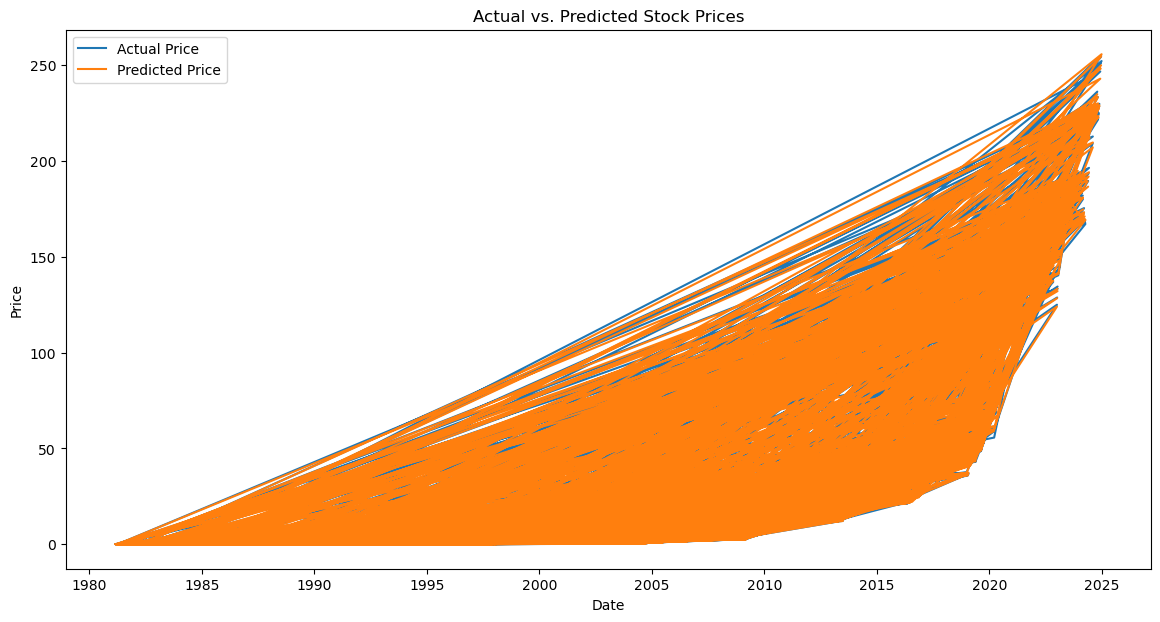

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))                                  # Creates a new figure with the specified size.
plt.plot(y_test.index, y_test.values, label='Actual Price')  # Plots the actual stock prices.
plt.plot(y_test.index, predictions, label='Predicted Price') # Plots the predicted stock prices.
plt.xlabel('Date')   # Labels the x and y axes
plt.ylabel('Price')  # Labels the x and y axes
plt.title('Actual vs. Predicted Stock Prices')     # Adds a title to the plot.
plt.legend()         # Displays the legend to differentiate between actual and predicted prices.
plt.show()           # Displays the plot.

Step 6: Implement Trading Strategy

Finally, we’ll implement a basic trading strategy based on our predictions. The strategy will buy when the predicted price is higher than the current price and sell when it’s lower.

- The loop iterates over each test data point:
— current_price = X_test.iloc[i][Close]: Gets the current stock price.
— predicted_price = predictions[i]: Gets the predicted stock price.
— If the predicted price is higher than the current price and there’s enough balance, it buys shares.
— If the predicted price is lower than the current price and there are shares held, it sells the shares.
- final_balance and profit: Calculates the final balance and profit after the trading period.

In [140]:
initial_balance = 10000  # Starting balance in USD
balance = initial_balance
position = 0  # Number of shares

for i in range(len(X_test)):
    current_price = X_test.iloc[i]['Close'][0].astype(float).tolist()
    predicted_price = predictions[i]

    if predicted_price > current_price and balance >= current_price:
        # Buy stock
        shares_to_buy = int(balance // current_price)  # Buy whole shares only
        if shares_to_buy > 0:  # Ensure we are buying at least one share
            position += shares_to_buy
            balance -= shares_to_buy * current_price
            print(f"Buying {shares_to_buy} shares at {current_price:.2f}")

    elif predicted_price < current_price and position > 0:
        # Sell stock
        balance += position * current_price
        print(f"Selling {position} shares at {current_price:.2f}")
        position = 0

# Calculate final balance including the value of the remaining shares
final_balance = balance + (position * X_test.iloc[-1]['Close'])
profit = final_balance - initial_balance
print(f"Final balance: ${final_balance:.2f}")
print(f"Profit: ${profit:.2f}")

Buying 65 shares at 152.48
Buying 9 shares at 9.72
Buying 2 shares at 0.44
Buying 6 shares at 0.06
Selling 82 shares at 212.59
Buying 92121 shares at 0.19
Buying 1 shares at 0.06
Selling 92122 shares at 18.62
Buying 35378 shares at 48.49
Buying 9 shares at 4.15
Buying 12 shares at 0.15
Selling 35399 shares at 85.77
Buying 116077 shares at 26.16
Buying 278 shares at 0.08
Selling 116355 shares at 26.62
Buying 9296142 shares at 0.33
Selling 9296142 shares at 14.86
Buying 439826766 shares at 0.31
Buying 1 shares at 0.18
Buying 1 shares at 0.06
Selling 439826768 shares at 163.90
Buying 5974616047 shares at 12.07
Buying 1 shares at 0.09
Selling 5974616048 shares at 110.04
Buying 4123925952606 shares at 0.16
Buying 1 shares at 0.04
Selling 4123925952607 shares at 49.32
Buying 118025620823948 shares at 1.72
Buying 1 shares at 1.03
Buying 2 shares at 0.11
Buying 2 shares at 0.05
Selling 118025620823953 shares at 17.64
Buying 7444576291993846 shares at 0.28
Selling 7444576291993846 shares at 172

/var/folders/xc/2rqfj6w15c54r07c609sytj40000gn/T/ipykernel_61344/2837540214.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = X_test.iloc[i]['Close'][0].astype(float).tolist()


TypeError: unsupported format string passed to Series.__format__

Use Case:
Implementing a trading strategy based on model predictions allows us to simulate real-world trading scenarios. It helps in understanding how model predictions can be used to make buy and sell decisions.

Conclusion:

In this article, we built a predictive model to forecast stock prices using Python and machine learning. We started by fetching historical stock data, preprocessing it, and creating features. We then trained a linear regression model and evaluated its performance. Finally, we implemented a basic trading strategy based on our predictions. While this is a simple example, it provides a foundation for more sophisticated financial models and strategies. Always remember to thoroughly backtest your strategies and understand the risks involved before using real money.

In [84]:
import re

text = """
Ticker
AAPL    152.481415
Name: 2023-02-13 00:00:00, dtype: float64
"""

# Extract the number using regular expression
match = re.search(r"(\d+\.\d+)", text)

if match:
    number = float(match.group(1))
    print("Extracted number:", number)
else:
    print("No number found in the text.")

Extracted number: 152.481415
